In [10]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft JhengHei'  # 或 'SimHei', 'DFKai-SB'


In [4]:
# 讀取推薦加購標籤資料
Y_PATH = "../data/training/Y_addon.jsonl"

with open(Y_PATH, "r", encoding="utf-8") as f:
    labels = [json.loads(line)["recommended_addon"] for line in f]

In [5]:
# 統計推薦次數（排除 None）
counter = Counter(labels)
filtered = {k: v for k, v in counter.items() if k is not None}
sorted_items = sorted(filtered.items(), key=lambda x: x[1], reverse=True)

In [6]:
# 拆成資料
product_ids = [x[0] for x in sorted_items]
counts = [x[1] for x in sorted_items]

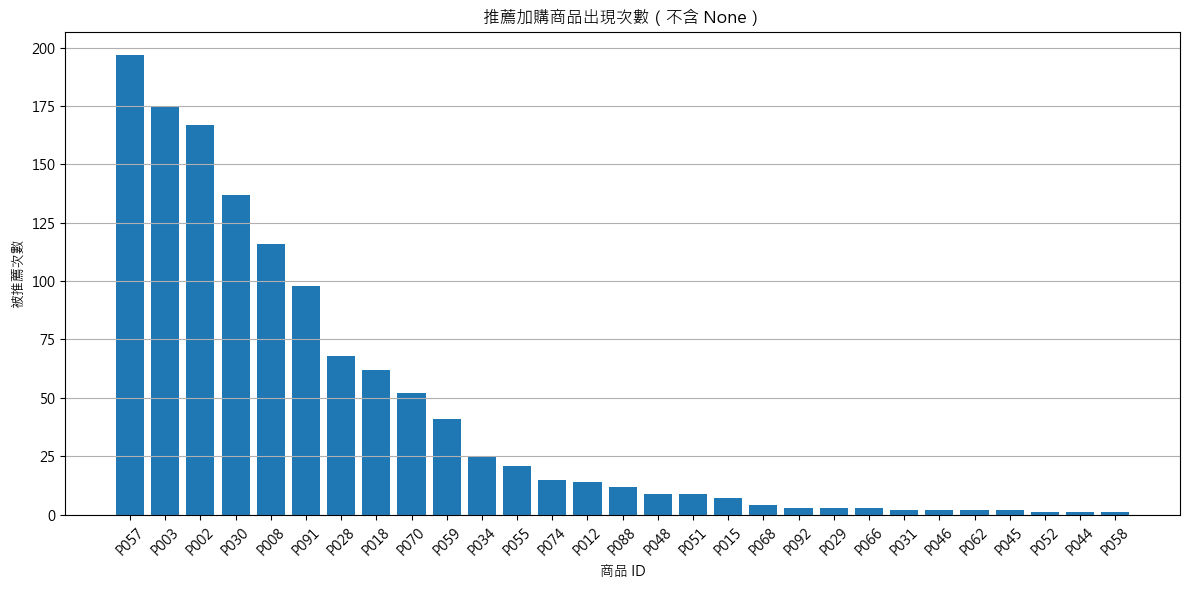

In [9]:
# 繪製長條圖
plt.figure(figsize=(12, 6))
plt.bar(product_ids, counts)
plt.title("推薦加購商品出現次數（不含 None）")
plt.xlabel("商品 ID")
plt.ylabel("被推薦次數")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [11]:
with open("../data/training/X_addon.jsonl", "r", encoding="utf-8") as f:
    records = [json.loads(line) for line in f]

df = pd.DataFrame([{
    "saved_by_addon": r["saved_by_addon"],
    "triggered_discounts": r["triggered_discounts"]
} for r in records])

In [12]:

print("📊 前 10 筆資料：")
display(df.head(10))

📊 前 10 筆資料：


,saved_by_addon,triggered_discounts
0,-455,1
1,-693,0
2,-751,0
3,-1786,0
4,-413,0
5,-898,0
6,-207,0
7,-1118,0
8,-1531,0
9,-378,0


In [13]:
print("📈 敘述統計：")
display(df.describe())

📈 敘述統計：


,saved_by_addon,triggered_discounts
count,187748.000000,187748.000000
mean,-684.183640,0.681733
std,668.316714,0.736212
min,-4930.000000,0.000000
25%,-1130.000000,0.000000
50%,-640.000000,1.000000
75%,-207.000000,1.000000
max,828.000000,2.000000


C:\Users\user\AppData\Local\Temp\ipykernel_12940\3991210050.py:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


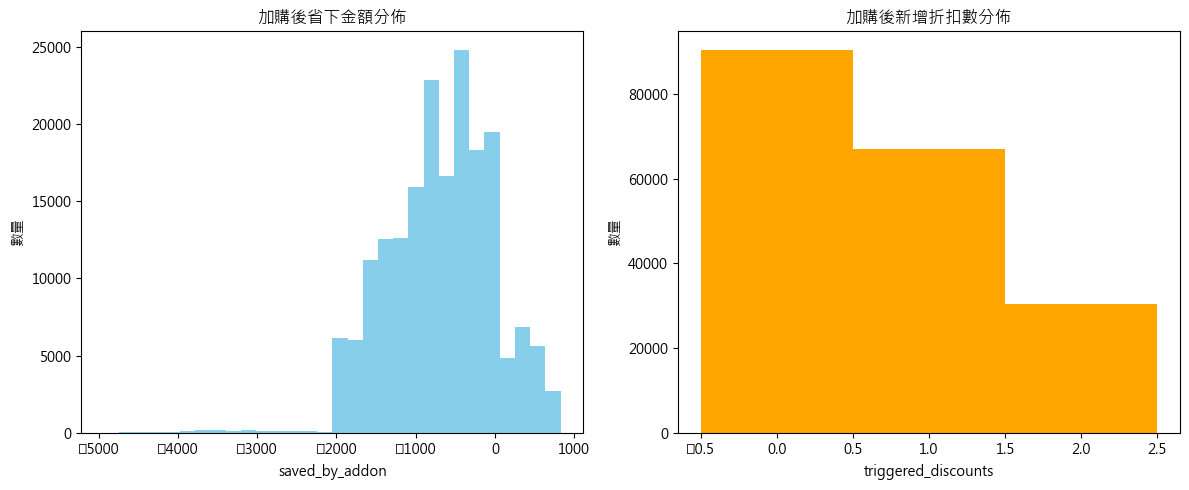

In [14]:
# 畫出分佈圖
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df["saved_by_addon"], bins=30, color="skyblue")
plt.title("加購後省下金額分佈")
plt.xlabel("saved_by_addon")
plt.ylabel("數量")

plt.subplot(1, 2, 2)
plt.hist(df["triggered_discounts"], bins=range(0, df["triggered_discounts"].max() + 2), align="left", color="orange")
plt.title("加購後新增折扣數分佈")
plt.xlabel("triggered_discounts")
plt.ylabel("數量")

plt.tight_layout()
plt.show()